### Fill in your name, student id number and email address
#### name: Oskari Läntinen
#### student id: 508244
#### email: osanlan@utu.fi

## Data analysis and knowledge discovery - Exercise 4: Unsupervised learning

This is the template for the fourth exercise. The idea of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering algorithm to find patterns - in this case clusters of ships with the same type - in the data, and then evaluate the performance of the algorithm. The same dataset (shipdata_2020.xlsx) will be used in this exercise as in the exercise 3 (don't do any changes to the file - all of the data processing should be done in this notebook).

 - Remember to comment your code to explain how it works and what it is supposed to do.

 - For doing the optional bonus task sufficiently well, you will be awarded one bonus point.
 
 - Name your file DAKD2020_ex3_firstname_lastname.ipynb
 
 - Deadline for submitting exercise 4 is **wednesday 16.12.2020**.

 - If you are having problems with this exercise, try google or stackoverflow first. If you cannot find a solution, ask for help in the course discussion forum in moodle or contact ilksuu@utu.fi.

### Import all the libraries etc. you need

In [8]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

### Read the data

Read the excel file containing the ship data into a pandas dataframe.

In [9]:
# Reading shipdata_2020
url = "C:\\Users\\Oskari\\Google Drive (osanlan@utu.fi)\\School\\DAaKD\\shipdata_2020.xlsx"
shipdata = pd.read_excel(url)

### Part 1: Preprocess and visualize the data

 - Use 'Speed', 'COG', 'Length' and Breadth' as features for this exercise. You will also need the 'Ship_type' -column later to be used as labels for assessing the performance of the clustering algorithm. Gather the features and labels in two arrays (e.g. X and Y).
 
 - Perform z-score standardization on the feature array to ensure that all features have equal weight.
 
 - Map the data to two dimensions by using principal component analysis and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet. Can you see distinct clusters in the scatter plot? How many clusters are there? (Don't worry if the clusters are difficult to see!)

In [10]:
X = shipdata[["Speed","COG","Length","Breadth"]]
Y = shipdata["Ship_type"]

In [11]:
# Z-score standardization
std_scaler = StandardScaler() # Initialise scaler
df_std = pd.DataFrame(std_scaler.fit_transform(X)) # Standardization
data = X.copy()
data["Speed"] = df_std[0] # Set standardized columns back to original data set
data["COG"] = df_std[1]
data["Length"] = df_std[2]
data["Breadth"] = df_std[3]
X = data.copy()

Text(0, 0.5, 'Component 2 (25.78%)')

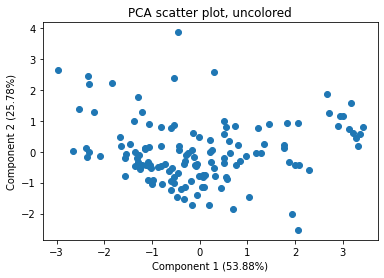

In [12]:
# PCA
# X is the data
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:,[0]],X_pca[:,[1]])

plt.title("PCA scatter plot, uncolored")
plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")


I can see maybe two clusters; one big in the center and a smaller one to the right.

### Part 2: Perform clustering on the data and evaluate the results using silhouette score
 
 - Perform agglomerative hierarchical clustering (sklearn.cluster.AgglomerativeClustering) on the data, trying different linkage criteria (ward, complete, single, average). Choose n_clusters -hyperparameter based on the number of classes (i.e. different ship types in the data). Use default values for the other hyperparameters.
 - Use the z-score standardized 4-dimensional data for the clustering - not the pca-transformed data!
 - Compute and print silhouette score for each clustering using a different linkage criterion. Which linkage criterion performs the best with respect to the silhouette score?

In [13]:
links = ["ward", "complete", "single", "average"]

plt.figure(figsize=[14,7])

for i in links:
    clustering = AgglomerativeClustering(linkage=i,n_clusters=3).fit(X)
    clustering
    labels = clustering.labels_
    score = silhouette_score(X, labels)
    print(i,score)


ward 0.43011853388720317
complete 0.3924324866218544
single 0.3035356273749434
average 0.3184751869502867


<Figure size 1008x504 with 0 Axes>

Ward performs best with a score of 0.43

###  Part 3: Compare the clusters with the true labels

 - If you performed the preprocessing steps as instructed, the linkage criterion with the highest silhouette score should be 'ward'. If a different linkage criterion performed better, make sure all the preprocessing steps were performed correctly. In any case, use 'ward' linkage criterion from here on.
 
 - Perform agglomerative hierarchical clustering using the chosen linkage criterion and the same number of clusters as before. Visualize the clusters in a scatter plot by performing pca transformation to two dimensions and color the scatter plot based on the predictions produced by the clustering algorithm.
 
 - Visualize the data again, this time coloring the scatter plot based on the true class labels. Compare the two scatter plots: how well do the clusters found by the clustering algorithm match the true classes? Place the two scatter plots so that they can easily be compared (e.g. in subplots next to each other in the same figure).
 
 - Based on the visual comparison between the clusters and true classes, would you say that the clustering was successful?
 
 - Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
     
- "Adjusted rand index" is corrected for chance by using maximum and expected values of rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)
 
- For an objective evaluation of the clustering, compute the adjusted rand score (sklearn.metrics.adjusted_rand_score) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 
- If the results seem unimpressive, don't get discouraged - clustering "real life" data sets is a difficult task, and a relatively low rand index does not necessarily mean that you have made a mistake.

Text(0, 0.5, 'Component 2 (25.78%)')

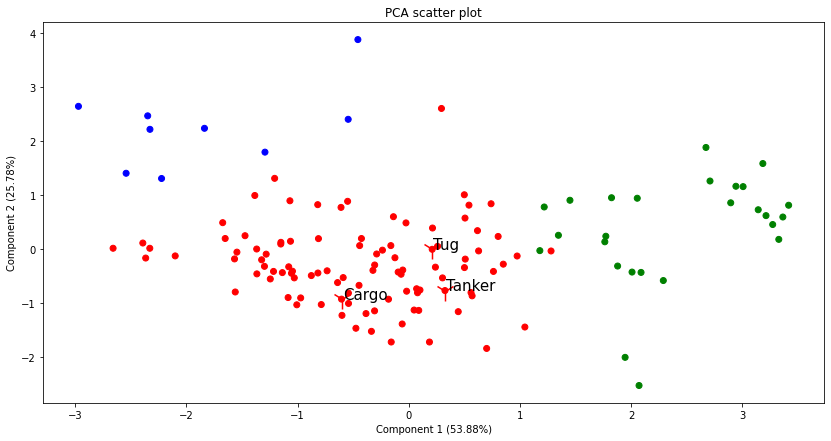

In [14]:
# Visualizing pca clusters
clustering = AgglomerativeClustering(linkage="ward",n_clusters=3).fit(X)
clustering
c_labels = clustering.labels_

#colors = ["red","green","blue"]

# PCA
# X is the data
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
# Label to color dict (manual)
#label_color_dict = {'Cargo':'red','Tanker':'green','Tug':'blue'}
label_color_dict = {0:'red',1:'green',2:'blue'}
cvec = [label_color_dict[label] for label in c_labels]

names = ["Cargo","Tanker","Tug"]

# Plotting
plt.figure(figsize=[14,7])
plt.scatter(X_pca[:,0],X_pca[:,1], c=cvec)

for i,name in enumerate(names):
    labelpad = 0.01   # Adjust this based on your dataset
    plt.text(X_pca[i,0]+labelpad, X_pca[i,1]+labelpad, name, fontsize=15)
    
    plt.scatter(X_pca[i,0], X_pca[i,1],
                c=cvec[i], vmin=min(cvec), vmax=max(cvec), s=400, marker="1")
    
plt.title("PCA scatter plot")
plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")


!NOTE! Markers are in a weird spot

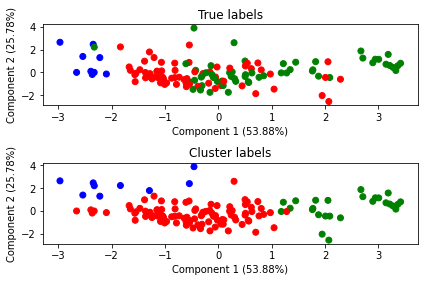

In [16]:
X_new = []
colors = {"Cargo":"red","Tanker":"green","Tug":"blue"}

for i,j in zip(X_pca,Y):
    X_new.append([i[0], i[1], j])

X_new = np.array(X_new)

fig, (ax1,ax2) = plt.subplots(2)

ax1.scatter(np.float64(X_new[:,0]),np.float64(X_new[:,1]),
              c=Y.map(colors))
ax1.set_title("True labels")
ax1.set_xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
ax1.set_ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")



ax2.scatter(X_pca[:,0],X_pca[:,1],
            c=cvec)
ax2.set_title("Cluster labels")
ax2.set_xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
ax2.set_ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")


plt.tight_layout()

plt.show()

Clustering is good but not perfect. Cargo ships include alot of other ships in clustering. Successful ? maybe or at least close to it

 - Rand score is a measure of similarity between two partitions of a set of elements - in this case true classes and clusters found by the clustering algorithm - and it is one of the most frequently used performance metrics for clustering. It is computed by considering each pair of elements in the dataset and counting pairs of elements as follows:
 
         a: number of pairs such that the elements are in the same class and in the same cluster
         b: number of pairs such that the elements are in different classes and in different clusters
         c: number of pairs such that the elements are in the same class but in different clusters
         d: number of pairs such that the elements are in different classes but in the same cluster
     
     Given a, b, c, d, the formula for rand index is:
     
         rand_index = (a+b)/(a+b+c+d).
    

- "Adjusted rand index" is corrected for chance by using maximum and expected values of rand index.

        adj_rand_index = (rand_index - expected_rand_index) / (max_rand_index - expected_rand_index)
 
- For an objective evaluation of the clustering, compute the adjusted rand score (sklearn.metrics.adjusted_rand_score) using the true labels and the labels predicted by clustering algorithm. How do you interpret the result?
 
- If the results seem unimpressive, don't get discouraged - clustering "real life" data sets is a difficult task, and a relatively low rand index does not necessarily mean that you have made a mistake.

In [17]:
l_dict = {"Cargo":0,"Tanker":1,"Tug":2}
labels_true = [l_dict[label] for label in Y]
labels_pred = c_labels

adjusted_rand_score(labels_pred,labels_true)

0.11644825726642981

If a score of 1 if perfect then 0.12 is really not that great..

### Part 4: Plot the dendrogram

 - As a last step, plot a dendrogram of the clustering to visualize the merging process.
 - For this you will need a linkage matrix - while you can extract one from the AgglomerativeClustering model, it is much easier to use the scipy implementation (scipy.cluster.hierarchy.linkage).
 - Compute the linkage matrix using Ward's method, and plot the dendrogram (using scipy.cluster.hierarchy.dendrogram). Truncate the dendrogram so that three levels of the dendrogram tree are visible for better readability.
 - Consult the course material. How do you interpret the dendrogram?

In [18]:
temp = c_labels

In [19]:
c_labels = temp

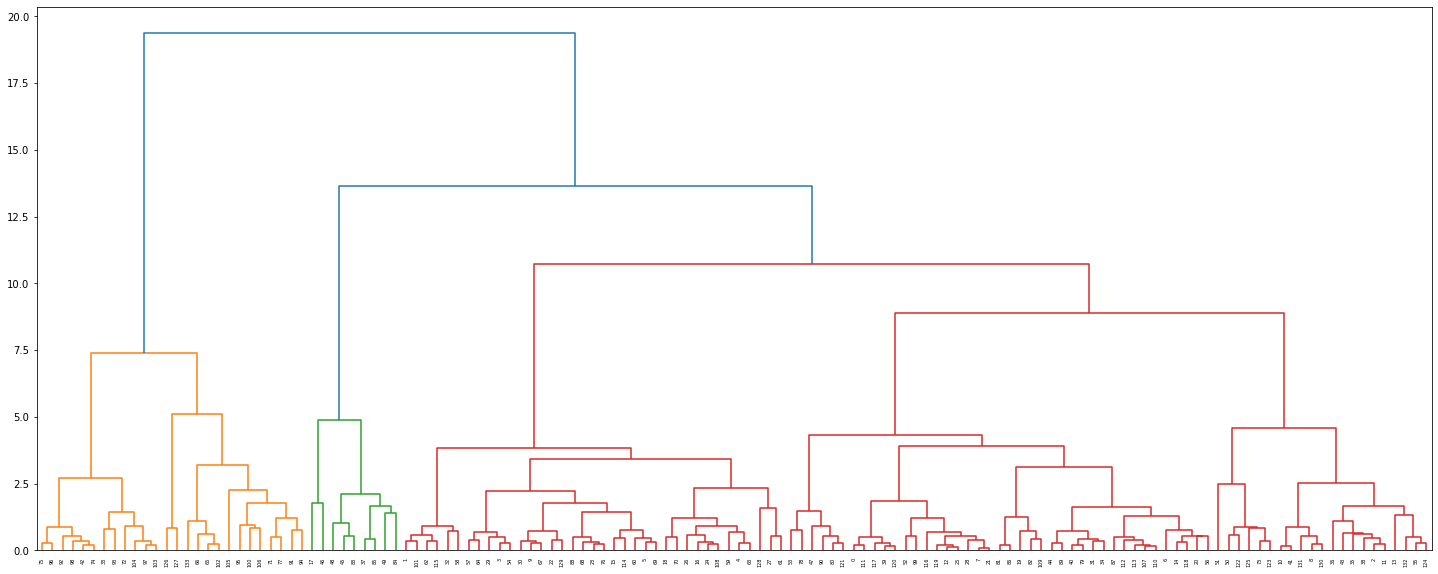

In [26]:
Z = linkage(X,"ward")
fig = plt.figure(figsize=(25,10))
dn = dendrogram(Z)#, truncate_mode="level",p=3)
plt.show()


Dendrogram draws a connection between items/clusters if they are connected. Seems to have 3 categories; yellow, green and red which sounds consistend with the original data. Looking at the untrunkade

### Part 5: Optional bonus task 

 - In this exercise you have used agglomerative hierarchical clustering to find patterns in the data. K-means clustering is another important method of unsupervised learning with many applications.
 - Write your own simple implementation of naive k-means clustering algorithm and use it to find patterns in the data as in part 3. Plot the result and print the rand score as in part 3.
 - As this is a relatively difficult task, a perfect implementation is not expected nor required for the bonus point.
 - Remember to comment the code extensively! (Bonus point will not be awarded for uncommented solution)

In [ ]:
# write code here, feel free to add more code cells as needed.